# Linear Regression

<p>

    Simple Linear Regression Model (SLRM)
        Equation of Simple Linear Regression
            Y = β0 + β1.x1 + e
            Where β0 and β1 are parameters.
    
        Estimated value for Y (ŷ)
            ŷ = β0 + β1.x1
    
        Least Squares Method
            Obtain the equation of the line that best describes the phenomenon
            Minimize errors
            Sum of errors equals 0
            Calculation of parameters β0 and β1
            β1 = (xi - x̄)(yi - ȳ) / (xi - x̄)²
            β0 = ȳ - β1x̄
    
        Interpretation of Parameters
            The coefficient β1 in simple linear regression represents an estimate of the change in ŷ corresponding to a one-unit change in xi.
            The coefficient β0 in simple linear regression represents an estimate of ŷ when xi is 0.

        Model Evaluation
            R2 (Coefficient of Determination):
                R2 = Σ(ŷ - ȳ)² / Σ(y - ȳ)²
                R2 = r² (correlation coefficient squared in the case of simple linear regression)
                R2 represents the proportion of variability in the dependent variable that can be explained by the estimated equation.

        RMSE (Root Mean Squared Error):
            RMSE is more commonly used as it is more conservative and emphasizes larger errors.
            RMSE estimates how much the model is erring in business values.
            RMSE = √Σ(y - ŷ)²/n
            Estimates how much the model is erring in business values.

        MAE (Mean Absolute Error):
            MAE is similar to RMSE but focuses on the absolute values of errors.

        MSE (Mean Squared Error):
            MSE is used for comparison but not for direct interpretation.

        MAPE (Mean Absolute Percentage Error):
            Not addressed yet; there are issues in its usage when presenting zero values.
            

    
    Multiple Linear Regression Model (MLRM)
        Equation of Multiple Linear Regression
            Y = β0 + β1.x1 + β2.x2 + ... + βp.xp + e

        Estimated value for Y (ŷ)
            ŷ = β0 + β1.x1 + β2.x2 + ... + βp.xp
    
        Interpretation of Parameters
            The coefficient βp in multiple regression represents an estimate of the change in y corresponding to a one-unit change in xp when all other independent variables remain constant.

        Model Evaluation
            R2 (Coefficient of Determination):
                R2 = Σ(ŷ - ȳ)² / Σ(y - ȳ)²
                R2 = r² (correlation coefficient squared in the case of simple linear regression)
                R2 represents the proportion of variability in the dependent variable that can be explained by the estimated equation.

            Adjusted R2:
                Used to compare models that use different attributes.
                R2adj = 1 - (1 - R2) * (n - 1) / (n - p - 1)
                n = number of rows
                p = number of columns (attributes)

            RMSE (Root Mean Squared Error):
                RMSE is more commonly used as it is more conservative and emphasizes larger errors.
                RMSE estimates how much the model is erring in business values.
                RMSE = √Σ(y - ŷ)²/n
                Estimates how much the model is erring in business values.

            MAE (Mean Absolute Error):
                MAE is similar to RMSE but focuses on the absolute values of errors.

            MSE (Mean Squared Error):
                MSE is used for comparison but not for direct interpretation.

            MAPE (Mean Absolute Percentage Error):
                Not addressed yet; there are issues in its usage when presenting zero values.

            Evaluation measures penalizing for both n rows and p columns (used for model comparison):
                AIC, AICC, BIC, and SBS.

        Significance Testing:
            F-Test: The F-test is used to determine if there is a significant relationship between the independent variables (at least one parameter different from 0). The F-test is known as a global significance test.
                H0: β1 = β2 = β3 = ... = βp = 0
                H1: One or more parameters are not equal to 0 (there is significance)

            t-Test: If the F-test shows that the multiple regression relationship is significant, a t-test can be performed to determine the significance of each individual parameter.
                Significant variables compose a statistically valid model, a model that persists over time.
                H0: βi = 0
                H1: βi ≠ 0 
                If H0 is rejected, the test provides sufficient statistical evidence to conclude that the parameter (βi) under study is not equal to zero, meaning the parameter is statistically significant.
                If H0 is not rejected, we do not have sufficient evidence to conclude that the parameter (βi) under study is statistically significant.

        Sequential Methods for Feature Selection:
            Aim to select columns that result in the model with the lowest ERROR, but it does not guarantee significance according to the t-test.
            - Forward (adds one at a time)
            - Backward (removes one at a time)
            - Stepwise

        Model Assumptions:
            To validate the multiple regression model, it is necessary to analyze the residuals (errors):
            1. The error is a random variable with a mean of zero.
            2. The variance of the error is equal across all x in the equation.
            3. Values of e are independent.
            4. The error is a random variable with a normal distribution (ŷ).

            We use residual plots in relation to ŷ for better interpretation, including QQ-plots. Residual plots are useful for validating assumptions of a regression model. If the review indicates that one or more assumptions are questionable, consider a different regression model or data transformation.

        Multicollinearity:
            Refers to the correlation between independent variables.
            - Under conditions of high multicollinearity, estimates by the least squares method may have a sign opposite to the estimated parameter.
            - A correlation coefficient greater than 0.70 or less than -0.70 for two independent variables is a practical warning of potential problems with multicollinearity.
            - Generates inconsistencies in the F-test of the set and the t-test of the variables.
            - VIF (Variance Inflation Factor) is a relative measure of the increase in variation due to collinearity.
                - A value greater than 5 should be investigated.
    
</p>

In [18]:
# Statsmodels nnotation
# parameters = model.params
# number_of_samples = model.nobs
# parameter_standard_errors = model.bse
# r2 = model.rsquared
# adjusted_r2 = model.rsquared_adj
# predictions = model.predict()
# predictions = model.fittedvalues
# t_values = model.tvalues
# residuals = model.resid
# confidence_interval = model.conf_int(alpha=0.05, cols=None)  # confidence interval for b0 and b1
# degrees_of_freedom = model.df_resid
# lower_prediction_interval = model.get_prediction().summary_frame()["obs_ci_lower"]
# upper_prediction_interval = model.get_prediction().summary_frame()["obs_ci_upper"]
# predicted_values = model.get_prediction().summary_frame()["mean"]
# manual access to values: model.summary().tables.data

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse, mse
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Example 1 - Simple Linear Regression

## Example 1.1 - Simple Linear Regression (Statsmodels)

In [3]:
# Load dataset
df = pd.read_csv('data/carst.csv', sep=',', encoding='utf-8')

# Define response variable
y = df['consumo']

# Define predictor variable
x = df['cap_vol']

# Train linear model
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

# Get prediction interval and predicted value
pred_ols = model.get_prediction()
df['lower_interval'] = pred_ols.summary_frame(alpha=0.05)["obs_ci_lower"]
df['upper_interval'] = pred_ols.summary_frame(alpha=0.05)["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame(alpha=0.05)["mean"]

# Calculate errors for model evaluation
rmse_value = rmse(df['consumo'], df['ŷ'])
mse_value = mse(df['consumo'], df['ŷ'])

# Display model information
print(model.summary())
print(f'\nRMSE: {rmse_value}')
print(f'\nMSE: {mse_value}')

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     129.9
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           1.30e-11
Time:                        16:50:17   Log-Likelihood:                -45.064
No. Observations:                  28   AIC:                             94.13
Df Residuals:                      26   BIC:                             96.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1440      0.427     28.435      0.0

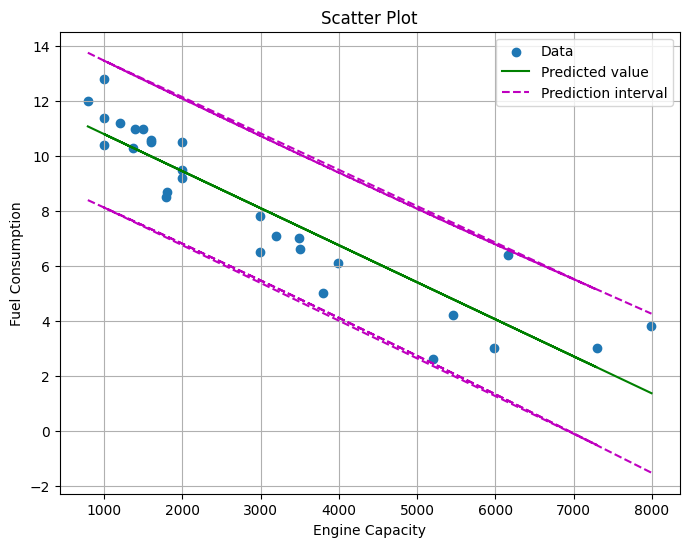

In [6]:
# Visualize results
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(df['cap_vol'], df['consumo'], label='Data')
plt.plot(df['cap_vol'], df['ŷ'], color='green', label='Predicted value')
plt.plot(df['cap_vol'], df['lower_interval'], 'm--', label='Prediction interval')
plt.plot(df['cap_vol'], df['upper_interval'], 'm--')
plt.xlabel('Engine Capacity')
plt.ylabel('Fuel Consumption')
plt.title('Scatter Plot')
plt.legend(loc='best')
plt.grid(True)
plt.show();


### Analyzing Residuals

Mean of errors: 1.887379141862766e-15



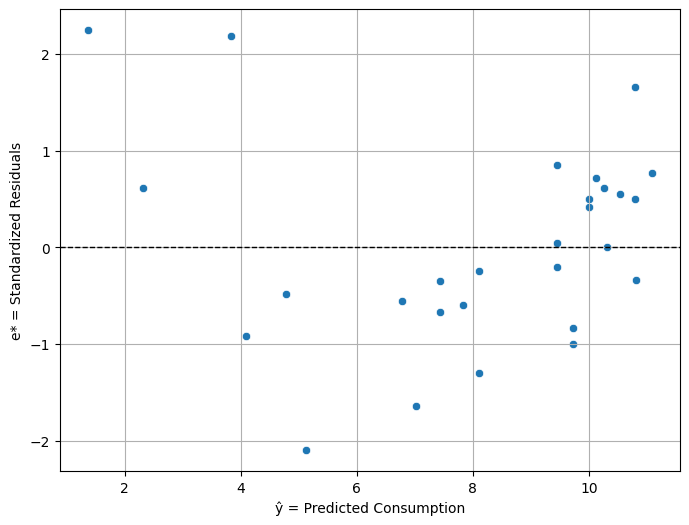

In [7]:
# Variance of standardized residuals (should be between -2 and 2)
residual = model.resid

# Create influence instance
influence = model.get_influence()

# Get standardized residuals
stdresid = list(influence.resid_studentized_internal)

# e/e* to check the proportionality between the residual and the standardized residual
prop = np.divide(residual, stdresid)

# Create a DataFrame for error analysis
error_df = pd.DataFrame({'y': df['consumo'], 
                         'ŷ': df['ŷ'], 
                         'e': residual,
                         'e*': stdresid,
                         'e/e*': prop})

# Mean of errors should be close to 0
mean_errors = error_df['e'].mean()
print(f'Mean of errors: {mean_errors}\n')

# Observe variance of errors
sns.scatterplot(x='ŷ', y='e*', data=error_df)
plt.xlabel('ŷ = Predicted Consumption')
plt.ylabel('e* = Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show();

Text(0, 0.5, 'Standardized Residuals')

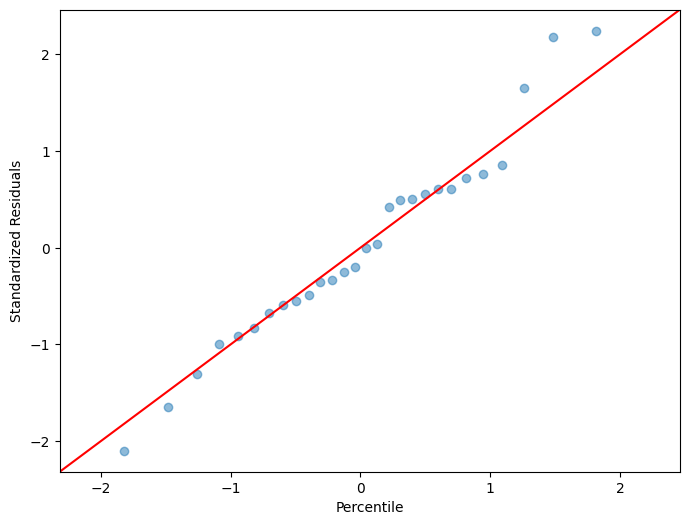

In [13]:
# QQ plot to visualize variance of standardized residuals
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentile')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')


In [14]:
# Normality test
# H0: Data is normal (p-value > 0.05)
# H1: Data is not normal (p-value < 0.05)
res = stats.shapiro(error_df['e'])
res

ShapiroResult(statistic=0.9768416881561279, pvalue=0.7692296504974365)

In [15]:
# Breusch-Pagan test for Homoscedasticity
# H0: Variances of errors are equal (homoscedasticity)
# H1: Variances of errors are not equal (heteroscedasticity)

# Column names
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

# Perform the test
test_result = sms.het_breuschpagan(model.resid, model.model.exog)

# Format the obtained data for visualization
list(zip(names, test_result))

[('Lagrange multiplier statistic', 7.189361228095695),
 ('p-value', 0.00733370832522016),
 ('f-value', 8.982107372064267),
 ('f p-value', 0.005928232361894992)]

## Example 1.2 - Simple Linear Regression (Sklearn)

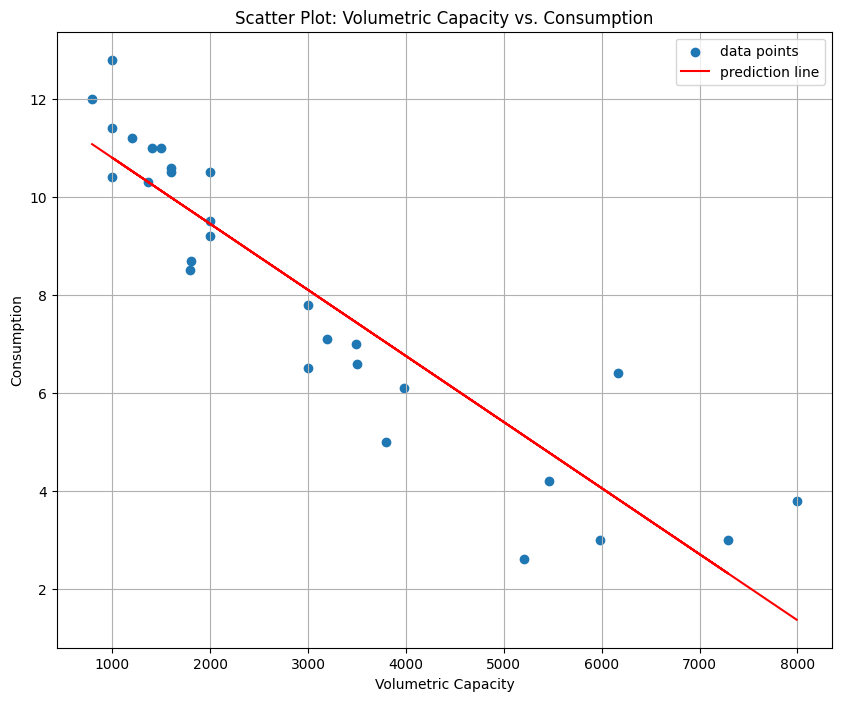

Simple Linear Regression (Sklearn)
MAE = 0.9792
MSE = 1.4638
RMSE = 1.2099
Linear coefficient: [12.14401012]
Angular coefficient: [[-0.00134785]]
Coefficient of determination: 0.8332512461736324


In [4]:
# Load dataset
df = pd.read_csv('data/carst.csv', delimiter=',', encoding='utf-8')

# Select features and target
x = df[['cap_vol']]
y = df[['consumo']]

# Train/Test split
#train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=1, train_size=0.8)

# Train the model
linearized_model = LinearRegression().fit(x, y)

# Predict values
yhat = linearized_model.predict(x)

# Line parameters
linear_coefficient = linearized_model.intercept_
angular_coefficient = linearized_model.coef_

# Coefficient of determination
r2 = linearized_model.score(x, y)

# Error calculation
MAE = mean_absolute_error(y, yhat)
MSE = mean_squared_error(y, yhat)
RMSE = np.sqrt(MSE)

# Results visualization
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label='data points')
plt.plot(x, yhat, color='red', label='prediction line')
plt.xlabel('Volumetric Capacity')
plt.ylabel('Consumption')
plt.title('Scatter Plot: Volumetric Capacity vs. Consumption')
plt.legend(loc="best")
plt.grid(True)
plt.show()

print('Simple Linear Regression (Sklearn)')
print("MAE = {:0.4f}".format(MAE))
print("MSE = {:0.4f}".format(MSE))
print("RMSE = {:0.4f}".format(RMSE))
print(f'Linear coefficient: {linear_coefficient}')
print(f'Angular coefficient: {angular_coefficient}')
print(f'Coefficient of determination: {r2}')

# Example 2 - Simple Linear Regression (Linearization)

## Example 2.1 - Simple Linear Regression - Linearization (Statsmodels)

In [17]:
# Create DataFrame
x = [5, 10, 15, 20, 25, 30, 45, 60]
y = [16.3, 9.7, 8.1, 4.2, 3.4, 2.9, 1.9, 1.3]

df = pd.DataFrame({'x': x, 'y': y})

# Define response variable
y = df['y']

# Define predictor variable
x = df['x']

# Obtain linear model
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

# Get prediction interval and predicted value
pred_ols = model.get_prediction()
df['lower_interval'] = pred_ols.summary_frame()["obs_ci_lower"]
df['upper_interval'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

# Calculate errors for model evaluation
rmse_value = rmse(df['y'], df['ŷ'])
mse_value = mse(df['y'], df['ŷ'])

# Display model information
print(model.summary())
print(f'\nRMSE: {rmse_value}')
print(f'\nMSE: {mse_value}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     11.48
Date:                Thu, 11 Jan 2024   Prob (F-statistic):             0.0147
Time:                        15:47:01   Log-Likelihood:                -19.587
No. Observations:                   8   AIC:                             43.17
Df Residuals:                       6   BIC:                             43.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8599      2.079      5.705      0.0

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


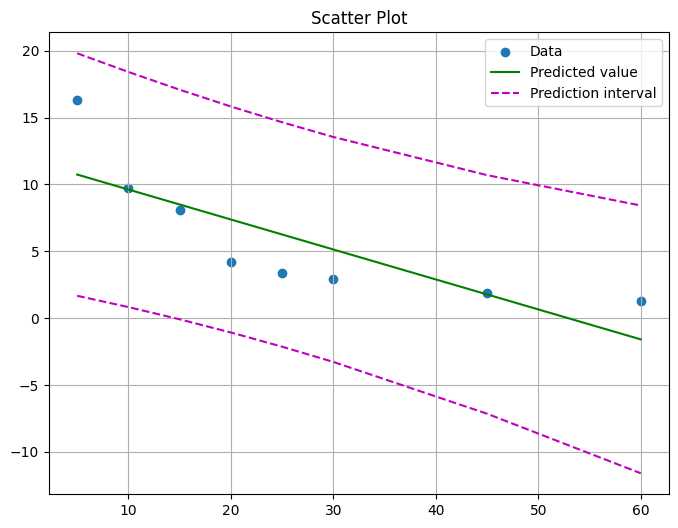

In [19]:
# Visualize results
plt.rcParams.update({'figure.figsize': (8, 6), 'figure.dpi': 100})
plt.scatter(df['x'], df['y'], label='Data')
plt.plot(df['x'], df['ŷ'], color='green', label='Predicted value')
plt.plot(df['x'], df['lower_interval'], 'm--', label='Prediction interval')
plt.plot(df['x'], df['upper_interval'], 'm--')
plt.title('Scatter Plot')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [21]:
# Apply log log transformation
# Create DataFrame
x = [5, 10, 15, 20, 25, 30, 45, 60]
y = [16.3, 9.7, 8.1, 4.2, 3.4, 2.9, 1.9, 1.3]

df = pd.DataFrame({'x': x, 'y': y})

# Define response variable after log transformation
df['vty'] = np.log(df['y'])
vty = df['vty']

# Define predictor variable after log transformation
df['vtx'] = np.log(df['x'])
vtx = df['vtx']

# Obtain linear model
vtx = sm.add_constant(vtx)
model = sm.OLS(vty, vtx).fit()

# Get prediction interval and predicted value
pred_ols = model.get_prediction()
df['lower_interval'] = pred_ols.summary_frame()["obs_ci_lower"]
df['upper_interval'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

# Calculate errors for model evaluation
rmse_value = rmse(df['y'], np.exp(df['ŷ']))
mse_value = mse(df['y'], np.exp(df['ŷ']))

# Display model information
print(model.summary())
print(f'\nRMSE: {rmse_value}')
print(f'\nMSE: {mse_value}')

                            OLS Regression Results                            
Dep. Variable:                    vty   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     239.1
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           4.63e-06
Time:                        15:49:23   Log-Likelihood:                 5.2525
No. Observations:                   8   AIC:                            -6.505
Df Residuals:                       6   BIC:                            -6.346
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6384      0.211     21.978      0.0

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


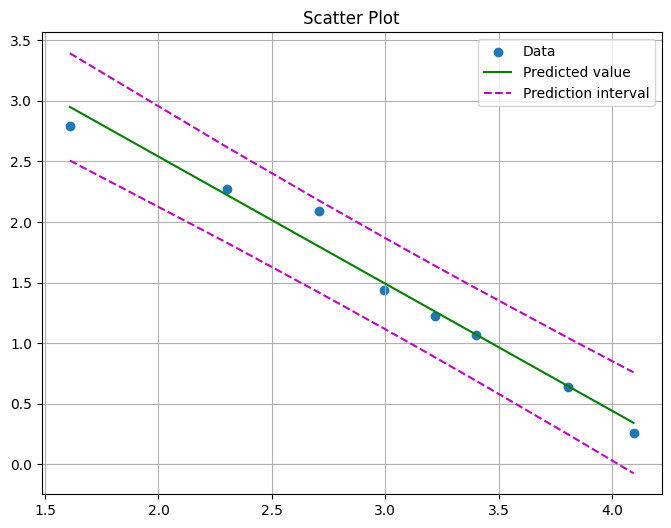

In [22]:
# Visualize log log transform results
plt.rcParams.update({'figure.figsize': (8, 6), 'figure.dpi': 100})
plt.scatter(df['vtx'], df['vty'], label='Data')
plt.plot(df['vtx'], df['ŷ'], color='green', label='Predicted value')
plt.plot(df['vtx'], df['lower_interval'], 'm--', label='Prediction interval')
plt.plot(df['vtx'], df['upper_interval'], 'm--')
plt.title('Scatter Plot')
plt.legend(loc='best')
plt.grid(True)
plt.show()

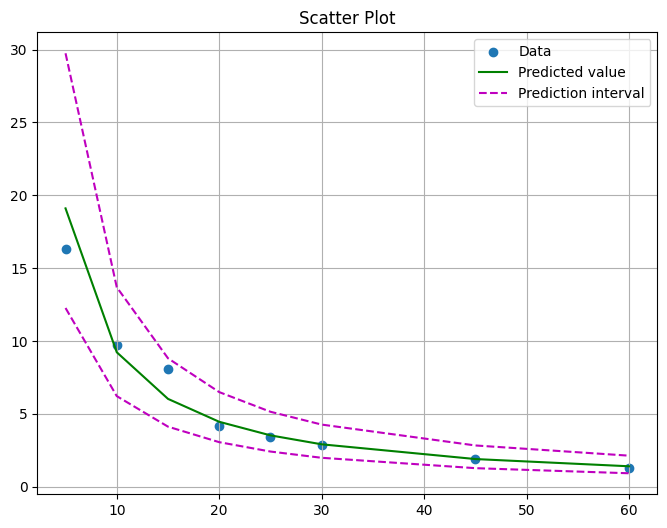

In [23]:
# Visualize results for original data
plt.rcParams.update({'figure.figsize': (8, 6), 'figure.dpi': 100})
plt.scatter(np.exp(df['vtx']), np.exp(df['vty']), label='Data')
plt.plot(np.exp(df['vtx']), np.exp(df['ŷ']), color='green', label='Predicted value')
plt.plot(np.exp(df['vtx']), np.exp(df['lower_interval']), 'm--', label='Prediction interval')
plt.plot(np.exp(df['vtx']), np.exp(df['upper_interval']), 'm--')
plt.title('Scatter Plot')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Analyzing Residuals

Mean of errors: -1.249000902703301e-16



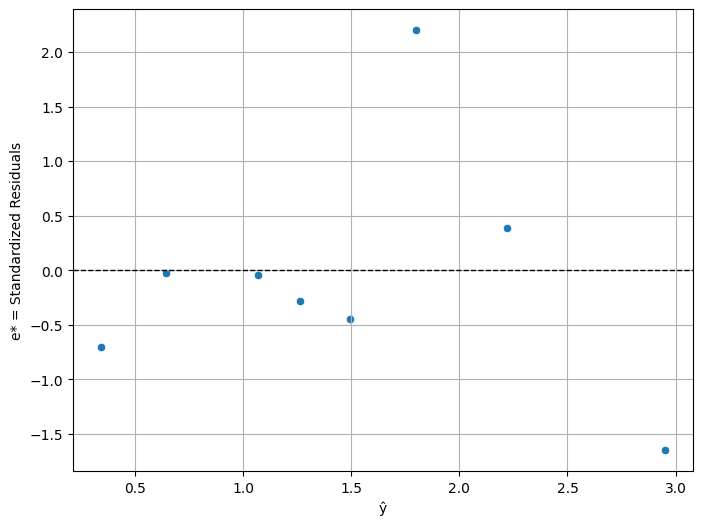

In [24]:
# Variance of residuals (should be between -2 and 2)
residuals = model.resid

# Create an instance of influence
influence = model.get_influence()

# Obtain standardized residuals
std_residuals = list(influence.resid_studentized_internal)

# e/e* to check the proportionality between the residual and the standardized residual
proportion = np.divide(residuals, std_residuals)

# Create a DataFrame for error analysis
error_df = pd.DataFrame({'y': df['y'],
                         'ŷ': df['ŷ'],
                         'e': residuals,
                         'e*': std_residuals,
                         'e/e*': proportion})

# Mean of errors should be equal to 0
mean_errors = error_df['e'].mean()
print(f'Mean of errors: {mean_errors}\n')

# Diagnostic Plot 3 (Standardized Residuals vs. Predicted Values)
sns.scatterplot(x='ŷ', y='e*', data=error_df)
plt.xlabel('ŷ')
plt.ylabel('e* = Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Standardized Residuals')

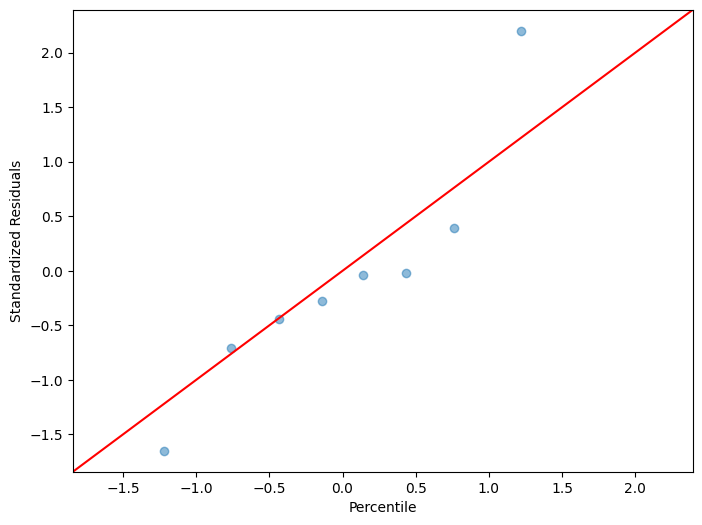

In [25]:
# QQ plot to visualize the variance of standardized residuals
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentile')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

In [27]:
# Shapiro-Wilk test for normality
# H0: The data is normally distributed (p-value > 0.5)
# H1: The data is not normally distributed (p-value < 0.5)
shapiro_test_result = stats.shapiro(error_df['e'])
shapiro_test_result

ShapiroResult(statistic=0.8502150177955627, pvalue=0.095748171210289)

In [29]:
# Breusch-Pagan test for homoscedasticity
# H0: The variances of the errors are equal (homoscedasticity)          # reliable model (statistical durability and consistency) + (constant error)
# H1: The variances of the errors are not equal (heteroscedasticity)    # unreliable model

# Column names
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

# Perform the test
test_result = sms.het_breuschpagan(model.resid, model.model.exog)

# Format the obtained data for visualization
list(zip(names, test_result))

[('Lagrange multiplier statistic', 0.9065455396750277),
 ('p-value', 0.3410326531438569),
 ('f-value', 0.7668017421515915),
 ('f p-value', 0.41488466657358297)]

## Example 2.2 - Simple Linear Regression - Linearization (Sklearn)

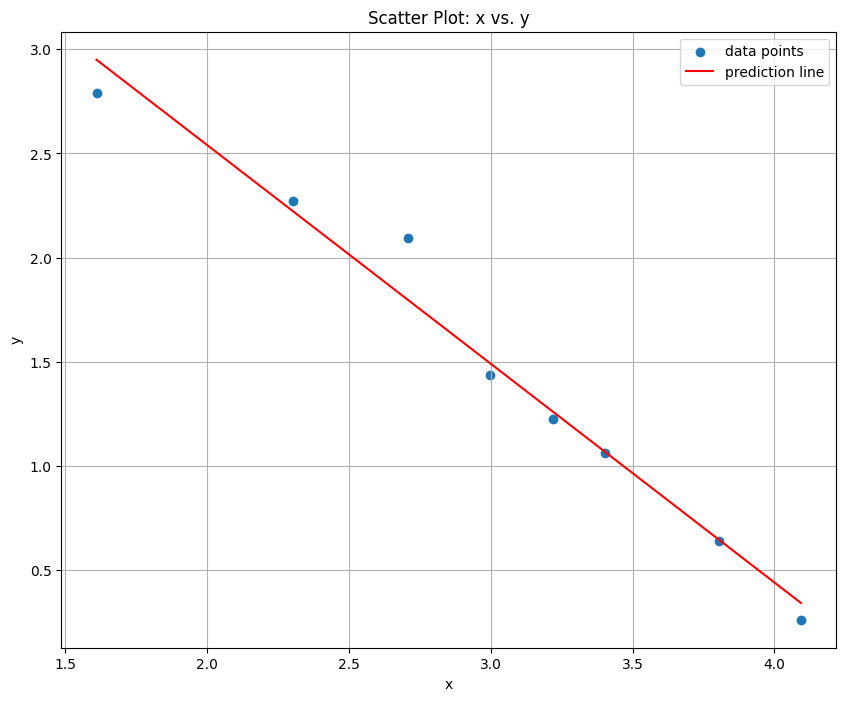

Simple Linear Regression (Sklearn)
MAE = 0.0861
MSE = 0.0157
RMSE = 0.1255
Linear coefficient: [4.63841488]
Angular coefficient: [[-1.04919812]]
Coefficient of determination: 0.9755162872695168


In [35]:
# Create dataframe
x = [5, 10, 15, 20, 25, 30, 45, 60]
y = [16.3, 9.7, 8.1, 4.2, 3.4, 2.9, 1.9, 1.3]

df = pd.DataFrame({'x':x, 'y':y})

# Select features and target
x = df[['x']]
y = df[['y']]

# Log log transformation
vtx = np.log(x)
vty = np.log(y)

# Train/Test split
#train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=1, train_size=0.8)

# Train the model
linearized_model = LinearRegression().fit(vtx, vty)

# Predict values
yhat = linearized_model.predict(vtx)

# Line parameters
linear_coefficient = linearized_model.intercept_
angular_coefficient = linearized_model.coef_

# Coefficient of determination
r2 = linearized_model.score(vtx, vty)

# Error calculation
MAE = mean_absolute_error(vty, yhat)
MSE = mean_squared_error(vty, yhat)
RMSE = np.sqrt(MSE)

# Results visualization
plt.figure(figsize=(10, 8))
plt.scatter(vtx, vty, label='data points')
plt.plot(vtx, yhat, color='red', label='prediction line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot: x vs. y')
plt.legend(loc="best")
plt.grid(True)
plt.show()

print('Simple Linear Regression (Sklearn)')
print("MAE = {:0.4f}".format(MAE))
print("MSE = {:0.4f}".format(MSE))
print("RMSE = {:0.4f}".format(RMSE))
print(f'Linear coefficient: {linear_coefficient}')
print(f'Angular coefficient: {angular_coefficient}')
print(f'Coefficient of determination: {r2}')

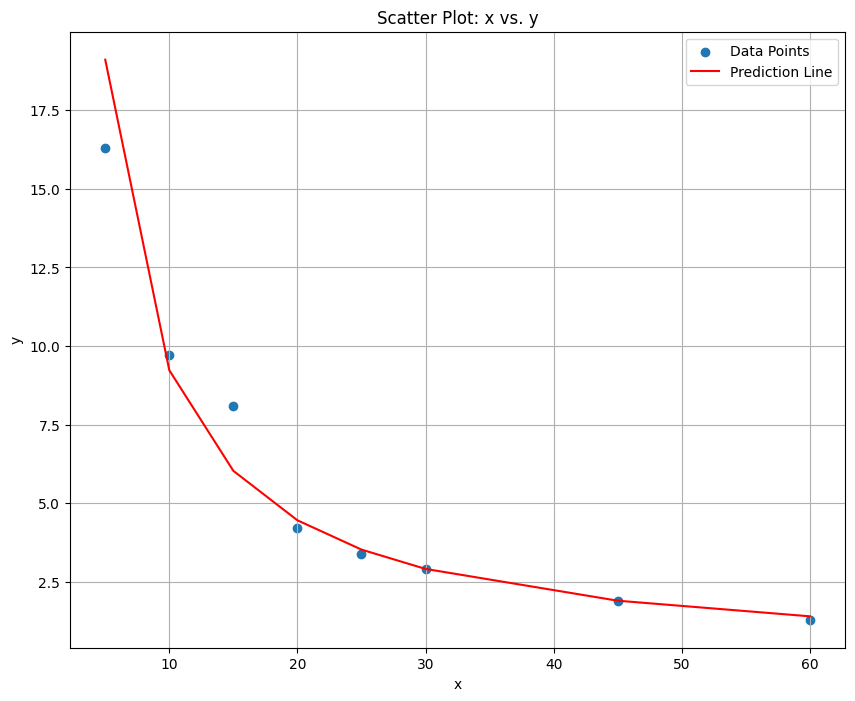

In [39]:
# Visualize in the original scale
plt.figure(figsize=(10, 8))
plt.scatter(np.exp(vtx), np.exp(vty), label='Data Points')
plt.plot(np.exp(vtx), np.exp(yhat), color='red', label='Prediction Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot: x vs. y')
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Example 3 - Polynomial Regression

## Examplo 3.1 - Polynomial Regression (Statsmodels)

In [40]:
# Create a DataFrame
x = [7, 10.3, 13.7, 16.6, 19.8, 22]
y = [479, 503, 487, 470, 458, 412]

df = pd.DataFrame({'x': x, 'y': y})

# Define response variable
y = df['y']

# Define predictor variable
x = df['x']

# Train linear model
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

# Obtain prediction interval and predicted values
pred_ols = model.get_prediction()
df['iv_l'] = pred_ols.summary_frame()["obs_ci_lower"]
df['iv_u'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

# Calculate errors for model evaluation
rmse = rmse(df['y'], df['ŷ'])
mse = mse(df['y'], df['ŷ'])

# Display model information
print(model.summary())
print(f'\nRMSE: {rmse}')
print(f'\nMSE: {mse}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6.950
Date:                Thu, 11 Jan 2024   Prob (F-statistic):             0.0578
Time:                        16:08:05   Log-Likelihood:                -25.637
No. Observations:                   6   AIC:                             55.27
Df Residuals:                       4   BIC:                             54.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        533.6984     26.328     20.271      0.0

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


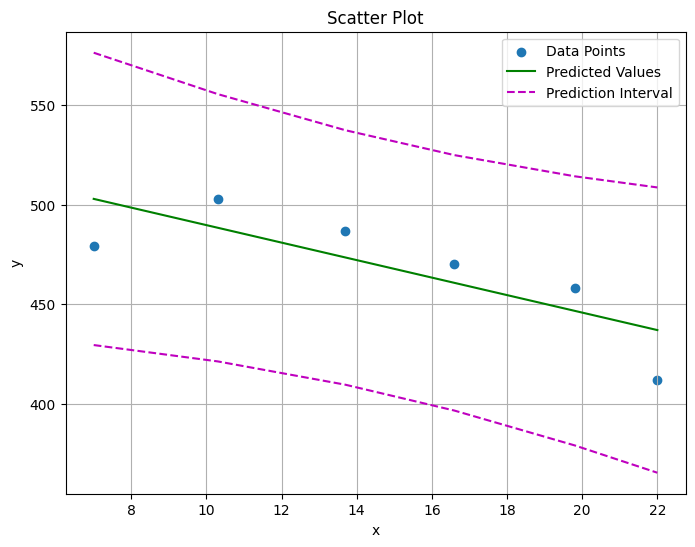

In [41]:
# Visualize results
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(df['x'], df['y'], label='Data Points')
plt.plot(df['x'], df['ŷ'], color='green', label='Predicted Values')
plt.plot(df['x'], df['iv_l'], 'm--', label='Prediction Interval')
plt.plot(df['x'], df['iv_u'], 'm--')
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [58]:
# Test polynomial model of degree 2

# Create a DataFrame
x = [7, 10.3, 13.7, 16.6, 19.8, 22]
y = [479, 503, 487, 470, 458, 412]

df = pd.DataFrame({'x': x, 'y': y})

# Define response variable
y = df['y']

# Define predictor variable
x = df['x']

# Transform predictor variable to a polynomial of degree 2
x = sm.add_constant(x)
polynomial_features = PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(x)

# Select columns
xp = xp[:, 1:]

# Train model
model = sm.OLS(y, xp).fit()

# Obtain prediction interval and predicted values
pred_ols = model.get_prediction()
df['iv_l'] = pred_ols.summary_frame()["obs_ci_lower"]
df['iv_u'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

# Calculate errors for model evaluation
rmse = rmse(df['y'], df['ŷ'])
mse = mse(df['y'], df['ŷ'])

# Display model information
print(model.summary())
print(f'\nRMSE: {rmse}')
print(f'\nMSE: {mse}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     22.51
Date:                Thu, 11 Jan 2024   Prob (F-statistic):             0.0156
Time:                        16:19:08   Log-Likelihood:                -20.339
No. Observations:                   6   AIC:                             46.68
Df Residuals:                       3   BIC:                             46.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        201.6198     18.226     11.062      0.0

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


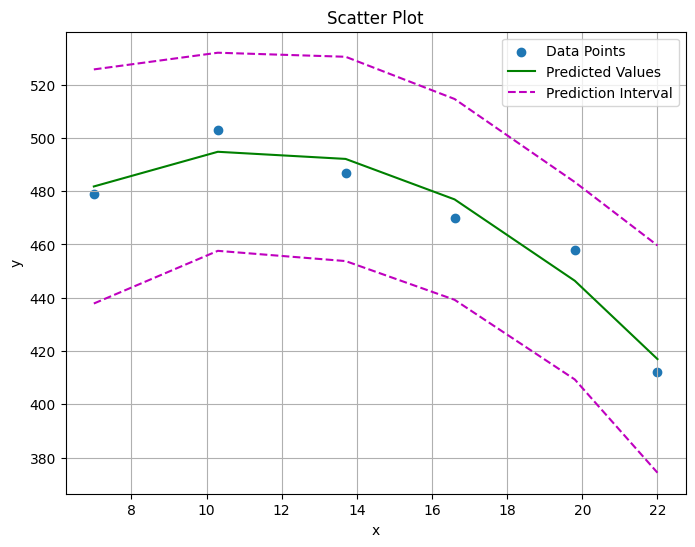

In [59]:
# Visualize results
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(df['x'], df['y'], label='Data Points')
plt.plot(df['x'], df['ŷ'], color='green', label='Predicted Values')
plt.plot(df['x'], df['iv_l'], 'm--', label='Prediction Interval')
plt.plot(df['x'], df['iv_u'], 'm--')
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Analyzing Residuals

Mean of errors: 4.926429634603361e-13



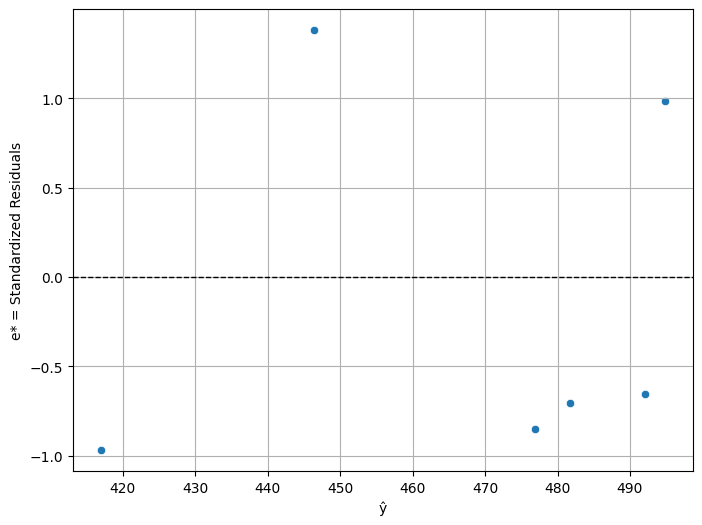

In [60]:
# Variance of standardized errors (should be between 2 and -2)
residue = model.resid

# Create influence instance
influence = model.get_influence()

# Obtain standardized residuals
std_residue = list(influence.resid_studentized_internal)

# e/e* to check the proportionality between the error and the standardized error
prop = np.divide(residue, std_residue)

df_errors = pd.DataFrame({'y':df['y'], 
                          'ŷ':df['ŷ'], 
                          'e':residue,
                          'e*':std_residue,
                          'e/e*':prop})

# Mean of errors should be equal to 0
mean_errors = df_errors['e'].mean()
print(f'Mean of errors: {mean_errors}\n')

# Observe variance of errors
sns.scatterplot(x='ŷ', y='e*', data=df_errors)
plt.xlabel('ŷ')
plt.ylabel('e* = Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Standardized Residuals')

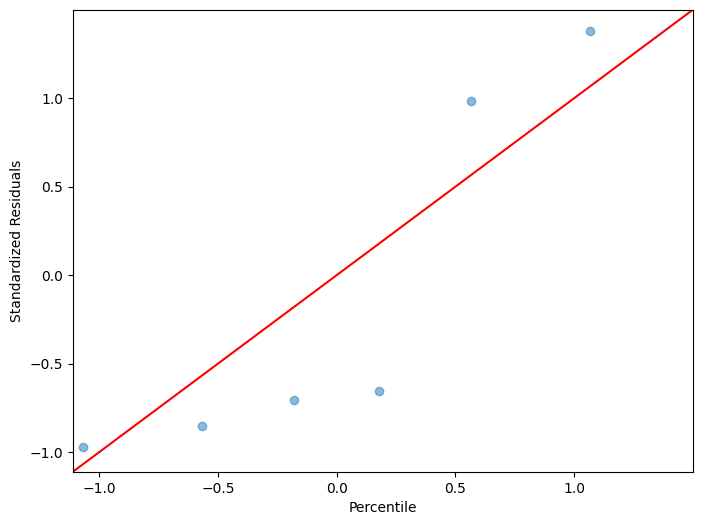

In [61]:
# QQ plot to visualize variance of errors
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentile')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

In [62]:
# Normality test
# H0: The data is normal (p-value > 0.5)
# H1: The data is not normal (p-value < 0.5)
res = stats.shapiro(df_errors['e'])
res

ShapiroResult(statistic=0.8137236833572388, pvalue=0.07781578600406647)

In [63]:
# Homoscedasticity test - Breusch-Pagan test
# H0: The variances of the errors are equal (homoscedasticity)                 # Reliable model (durability and statistical consistency) + (constant error)
# H1: The variances of the errors are not equal (heteroscedasticity)           # Unreliable model

# Column names
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

# Perform the test
test_result = sms.het_breuschpagan(model.resid, model.model.exog)

# Format the obtained data for visualization
lzip(names, test_result)

[('Lagrange multiplier statistic', 1.3338179136047346),
 ('p-value', 0.855612262763665),
 ('f-value', 0.42877170958253574),
 ('f p-value', 0.6858286879570307)]

## Examplo 3.2 - Polynomial Regression (Sklearn)

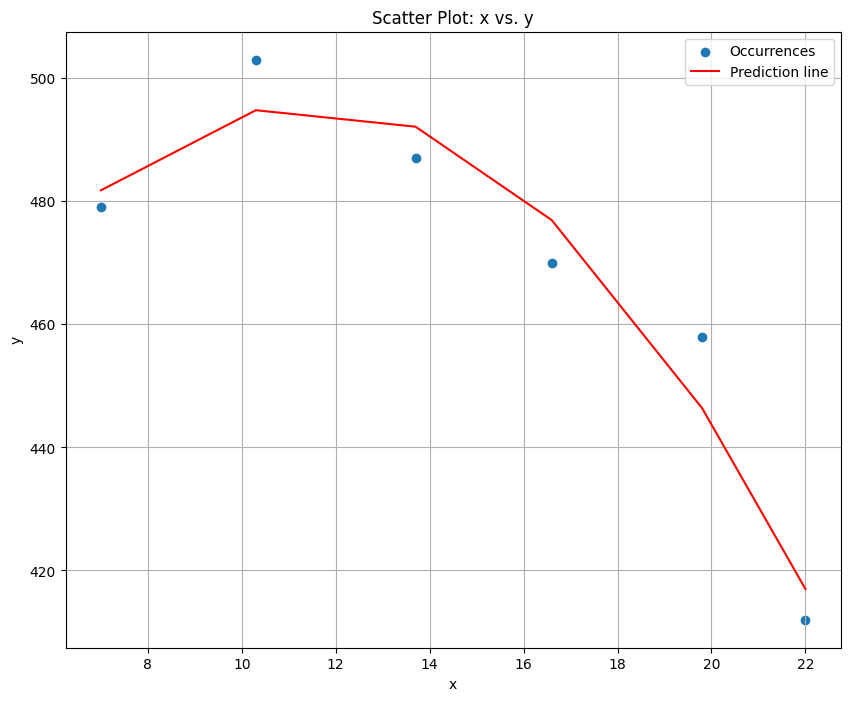

Polynomial Regression Sklearn
MAE = 6.6066
MSE = 51.5182
RMSE = 7.1776
Intercept Coefficient: [403.23955811]
Slope Coefficients: [[ 0.         16.16364738 -0.70629119]]
Coefficient of Determination: 0.937513765115124


In [64]:
# Create a dataframe
x = [7, 10.3, 13.7, 16.6, 19.8, 22]
y = [479, 503, 487, 470, 458, 412]

df = pd.DataFrame({'x': x, 'y': y})

# Select features
x = df[['x']].values

# Select target
y = df[['y']].values

# Train/test split
# train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=1, train_size=0.8)

# Obtain polynomial features
polynomial_features = PolynomialFeatures(degree=2)
xpol = polynomial_features.fit_transform(x)

# Train the model
polynomial_model = LinearRegression().fit(xpol, y)

# Predict values
yhat = polynomial_model.predict(xpol)

# Parameters
intercept_coefficient = polynomial_model.intercept_
slope_coefficient = polynomial_model.coef_

# Coefficient of determination
r2 = polynomial_model.score(xpol, y)

# Errors
MAE = mean_absolute_error(y, yhat)
MSE = mean_squared_error(y, yhat)
RMSE = np.sqrt(MSE)

# Data visualization
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label='Occurrences')
plt.plot(x, yhat, color='red', label='Prediction line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot: x vs. y')
plt.legend(loc="best")
plt.grid(True)
plt.show()

print('Polynomial Regression Sklearn')
print("MAE = {:0.4f}".format(MAE))
print("MSE = {:0.4f}".format(MSE))
print("RMSE = {:0.4f}".format(RMSE))
print(f'Intercept Coefficient: {intercept_coefficient}')
print(f'Slope Coefficients: {slope_coefficient}')
print(f'Coefficient of Determination: {r2}')

# Example 4 - Multiple Linear Regression

## Example 4.1 - Multiple Linear Regression (Statsmodels)

In [66]:
# Create a dataframe
# Predictor variables
x1 = [2.04, 2.04, 3.06, 3.06, 4.08, 4.08, 2.06, 2.06, 3.08, 3.08, 4.11, 4.11, 2.01, 3.02, 4.03]
x2 = [3.55, 6.07, 3.55, 6.07, 3.55, 6.16, 3.62, 6.16, 3.62, 5.89, 3.62, 5.89, 6.18, 6.18, 6.18]
x3 = np.multiply(x1, x2)

# Response variable
y = [3.11, 3.26, 3.89, 10.25, 3.11, 13.48, 3.94, 3.53, 3.36, 6.49, 2.72, 12.48, 2.82, 5.19, 8.04]

df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})

# Train the model
modelo = smf.ols('y ~ x1 + x2 + x3', data=df).fit()

# Obtain prediction interval and predicted values
pred_ols = modelo.get_prediction()
df['iv_l'] = pred_ols.summary_frame()["obs_ci_lower"]
df['iv_u'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

# Calculate errors for model evaluation
rmse = rmse(df['y'], df['ŷ'])
mse = mse(df['y'], df['ŷ'])

# Display model information
print(modelo.summary())
print(f'\nRMSE: {rmse}')
print(f'\nMSE: {mse}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     17.31
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           0.000178
Time:                        16:22:34   Log-Likelihood:                -27.112
No. Observations:                  15   AIC:                             62.22
Df Residuals:                      11   BIC:                             65.06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2787      7.167      2.411      0.0

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Analyzing Residuals

Mean of the errors: -2.954673542869083e-14



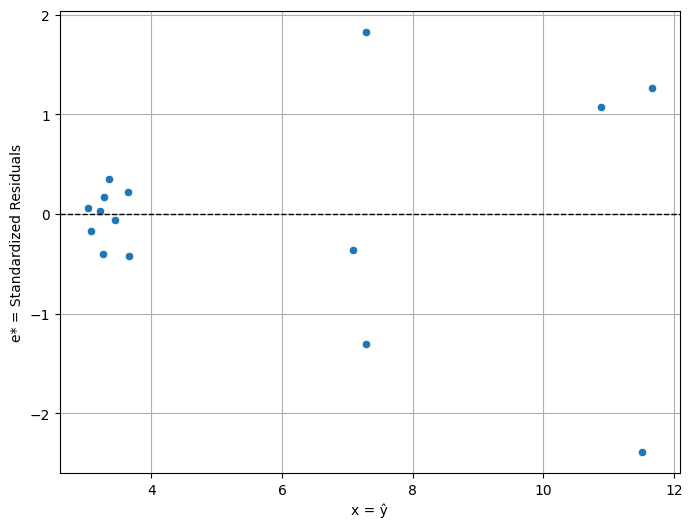

In [68]:
# Variance of the errors (should be between 2 and -2)
residual = modelo.resid

# Create an influence instance
influence = modelo.get_influence()

# Obtain standardized residuals
std_residual = list(influence.resid_studentized_internal)

# e/e* to check the proportionality between the error and the standardized error
prop = np.divide(residual, std_residual)

df_errors = pd.DataFrame({'y':df['y'],
                          'ŷ':df['ŷ'],
                          'e':residual,
                          'e*':std_residual,
                          'e/e*':prop})

# The mean of the errors should be equal to 0
mean_errors = df_errors['e'].mean()
print(f'Mean of the errors: {mean_errors}\n')

# Observe the variance of the errors
sns.scatterplot(x='ŷ', y='e*', data=df_errors)
plt.xlabel('x = ŷ')
plt.ylabel('e* = Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show();

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Standardized Residuals')

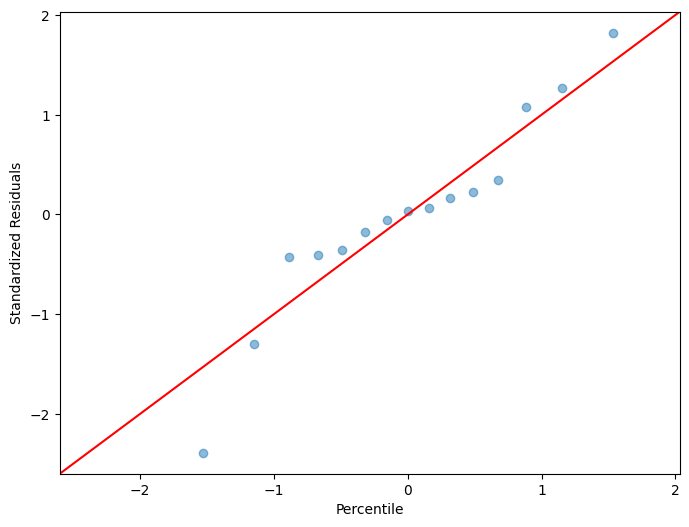

In [69]:
# QQ plot to visualize the variance of the errors
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentile')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

In [71]:
# Normality test
# H0: The data is normal (p-value > 0.5)
# H1: The data is not normal (p-value < 0.5)
res = stats.shapiro(df_errors['e'])
res

ShapiroResult(statistic=0.9371870756149292, pvalue=0.3483145236968994)

In [72]:
# Breusch-Pagan Homoscedasticity Test
# H0: The variances of the errors are equal (homoscedasticity)                      # reliable model (statistical durability and consistency) + (constant error)
# H1: The variances of the errors are not equal (heteroscedasticity)                # unreliable model

# column names
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
 
# perform the test
test_result = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

# format obtained data for visualization
lzip(names, test_result)

[('Lagrange multiplier statistic', 7.729134070141237),
 ('p-value', 0.0519542841237781),
 ('f-value', 3.897769334571549),
 ('f p-value', 0.040323429283969564)]

## Example 4.2 - Multiple Linear Regression (Sklearn)

In [73]:
# Create DataFrame
# Predictor variables
x1 = [2.04, 2.04, 3.06, 3.06, 4.08, 4.08, 2.06, 2.06, 3.08, 3.08, 4.11, 4.11, 2.01, 3.02, 4.03]
x2 = [3.55, 6.07, 3.55, 6.07, 3.55, 6.16, 3.62, 6.16, 3.62, 5.89, 3.62, 5.89, 6.18, 6.18, 6.18]
x3 = np.multiply(x1, x2)

# Response variable
y = [3.11, 3.26, 3.89, 10.25, 3.11, 13.48, 3.94, 3.53, 3.36, 6.49, 2.72, 12.48, 2.82, 5.19, 8.04]

df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})

# Select features and target
x = df[['x1', 'x2', 'x3']]
y = df[['y']]

# Train/test split
# train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=1, train_size=0.8)

# Train the model
linear_model = LinearRegression().fit(x, y)

# Predict values
yhat = linear_model.predict(x)

# Line parameters
intercept_coefficient = linear_model.intercept_
slope_coefficients = linear_model.coef_

# Coefficient of determination
r2 = linear_model.score(x, y)

# Error calculation
MAE = mean_absolute_error(y, yhat)
MSE = mean_squared_error(y, yhat)
RMSE = np.sqrt(MSE)

print('Sklearn Multiple Linear Regression')
print("MAE = {:0.4f}".format(MAE))
print("MSE = {:0.4f}".format(MSE))
print("RMSE = {:0.4f}".format(RMSE))
print(f'Intercept Coefficient: {intercept_coefficient}')
print(f'Slope Coefficients: {slope_coefficients}')
print(f'Coefficient of Determination: {r2}')

Sklearn Multiple Linear Regression
MAE = 1.0131
MSE = 2.1752
RMSE = 1.4748
Intercept Coefficient: [17.27869389]
Slope Coefficients: [[-6.36775762 -3.65842623  1.70673153]]
Coefficient of Determination: 0.8252037753778994


# Example 5 - Multicolinearity

In [5]:
# Load dataset
df = pd.read_excel("data/Galoes.xlsx")

# Train model
modelo = smf.ols('Tempo_viagem ~ Galoes_gastos + Milhas_percorridas', data=df).fit()

# View results
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           Tempo_viagem   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     8.537
Date:                Thu, 11 Jan 2024   Prob (F-statistic):             0.0133
Time:                        16:50:45   Log-Likelihood:                -12.370
No. Observations:                  10   AIC:                             30.74
Df Residuals:                       7   BIC:                             31.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.6590      1

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                    Tempo_viagem  Milhas_percorridas  Galoes_gastos
Tempo_viagem            1.000000            0.814906       0.752834
Milhas_percorridas      0.814906            1.000000       0.978103
Galoes_gastos           0.752834            0.978103       1.000000


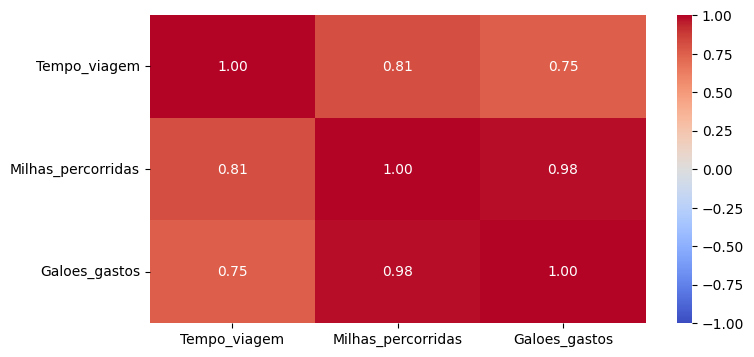

In [76]:
# Calculate the correlation between numerical attributes
corr = df.corr()
print(corr)

# Visualize in a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [77]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calculate_vif(df):
    vif = pd.DataFrame()
    vif['features'] = df.columns
    vif['VIF_values'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)
  
features = df[['Milhas_percorridas', 'Galoes_gastos']]
calculate_vif(features)

,features,VIF_values
0,Milhas_percorridas,450.014302
1,Galoes_gastos,450.014302


# Example 6 - Multiple Linear Regression and Feature Selection

### Extract and Pre-processing

In [6]:
# Dataset link: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset?select=bodyfat.csv
df = pd.read_csv('data/Bodyfat.csv', sep=',', encoding='utf-8')

# View data
df.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [79]:
# Observe type, nulls, number of rows, and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   bodyfat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [80]:
# Check for duplicate data
df.loc[df.duplicated(), :]

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


In [81]:
# Data dictionary
attributes = df.columns

types = [
        'Continuous Quantitative',
        'Continuous Quantitative',
        'Discrete Quantitative',
        'Continuous Quantitative',
        'Continuous Quantitative',
        'Continuous Quantitative',
        'Continuous Quantitative',
        'Continuous Quantitative',
        'Continuous Quantitative',
        'Continuous Quantitative',
        'Continuous Quantitative',
        'Continuous Quantitative',
        'Continuous Quantitative',
        'Continuous Quantitative',
        'Continuous Quantitative'
]

descriptions = [
        'Body density in kilograms per liter',
        'Body fat percentage',
        'Age in years',
        'Weight in pounds',
        'Height (inches)',
        'Neck measurement in centimeters',
        'Chest measurement in centimeters',
        'Abdomen measurement in centimeters',
        'Hip measurement in centimeters',
        'Thigh measurement in centimeters',
        'Knee measurement in centimeters',
        'Ankle measurement in centimeters',
        'Biceps measurement in centimeters',
        'Forearm measurement in centimeters',
        'Wrist measurement in centimeters'
]

data_dict = pd.DataFrame({'attributes': attributes, 'type': types, 'description': descriptions})
data_dict.head(len(attributes))

,attributes,type,description
0,Density,Continuous Quantitative,Body density in kilograms per liter
1,bodyfat,Continuous Quantitative,Body fat percentage
2,Age,Discrete Quantitative,Age in years
3,Weight,Continuous Quantitative,Weight in pounds
4,Height,Continuous Quantitative,Height (inches)
5,Neck,Continuous Quantitative,Neck measurement in centimeters
6,Chest,Continuous Quantitative,Chest measurement in centimeters
7,Abdomen,Continuous Quantitative,Abdomen measurement in centimeters
8,Hip,Continuous Quantitative,Hip measurement in centimeters
9,Thigh,Continuous Quantitative,Thigh measurement in centimeters


### Descriptive Statistics

count    252.000000
mean      70.148810
std        3.662856
min       29.500000
25%       68.250000
50%       70.000000
75%       72.250000
max       77.750000
Name: Height, dtype: float64


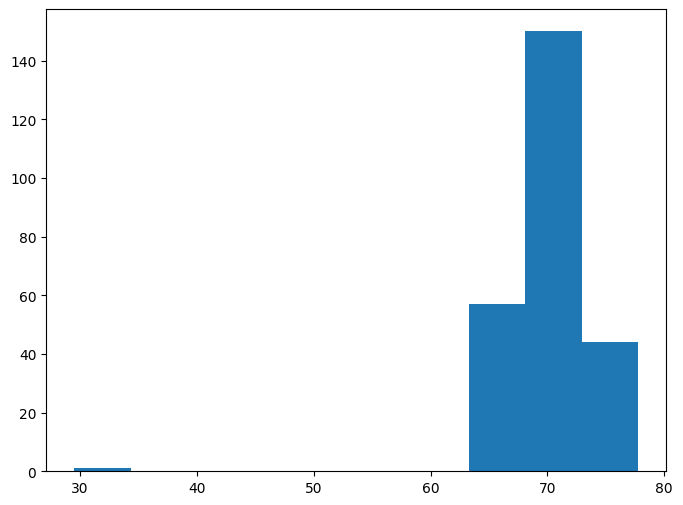

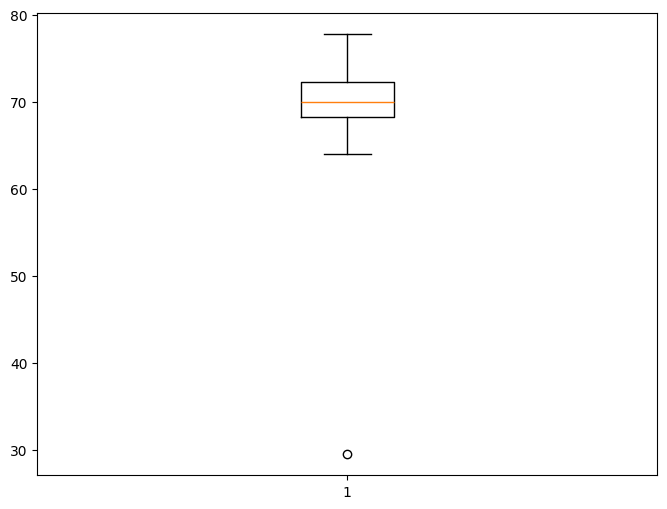

In [82]:
# Someone has a height of approximately 0.75 meters, and we don't have babies in the dataset (minimum age = 22)
print(df['Height'].describe())

plt.hist(df['Height'])
plt.show()

plt.boxplot(df['Height'])
plt.show()

count    252.000000
mean      19.150794
std        8.368740
min        0.000000
25%       12.475000
50%       19.200000
75%       25.300000
max       47.500000
Name: bodyfat, dtype: float64


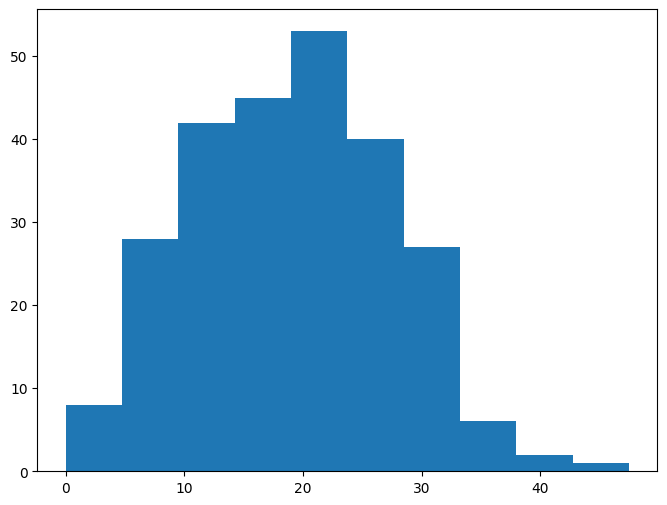

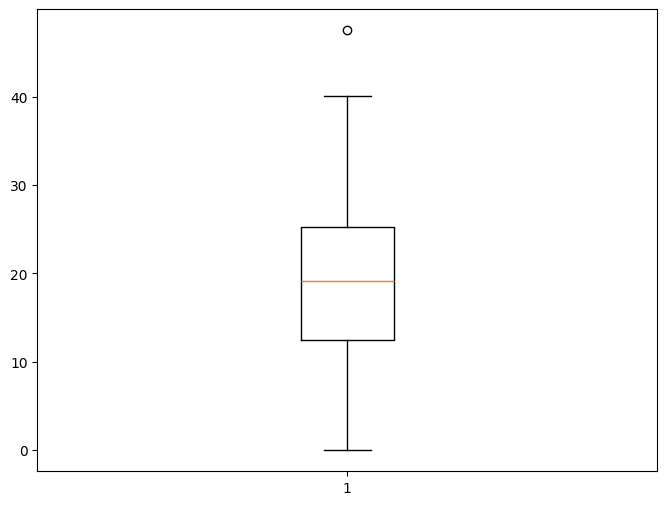

In [83]:
# There is no bodyfat = 0
print(df['bodyfat'].describe())

plt.hist(df['bodyfat'])
plt.show()

plt.boxplot(df['bodyfat'])
plt.show()

In [84]:
# Remove outlier found in Height and value 0 from bodyfat
df = df[(df['Height'] > 30) & (df['bodyfat'] != 0)]
df.shape

(250, 15)

In [85]:
# Correlation analysis between variables (avoid multicollinearity: corr > 0.7 or corr < -0.7)
corr = df.corr()
corr

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.987882,-0.279713,-0.583408,0.048294,-0.470276,-0.673420,-0.793703,-0.595308,-0.535225,-0.477781,-0.250249,-0.479796,-0.338860,-0.320060
bodyfat,-0.987882,1.000000,0.293141,0.603436,-0.031899,0.489598,0.695889,0.808860,0.612743,0.543837,0.493577,0.253606,0.486724,0.351322,0.343831
Age,-0.279713,0.293141,1.000000,-0.015846,-0.247185,0.111440,0.175146,0.230136,-0.053935,-0.207306,0.014923,-0.108311,-0.043615,-0.088921,0.212272
Weight,-0.583408,0.603436,-0.015846,1.000000,0.486454,0.832411,0.892283,0.885628,0.942633,0.868040,0.850656,0.608185,0.798397,0.625035,0.731196
Height,0.048294,-0.031899,-0.247185,0.486454,1.000000,0.316976,0.222017,0.186010,0.374945,0.340396,0.503077,0.390583,0.315819,0.318065,0.394146
Neck,-0.470276,0.489598,0.111440,0.832411,0.316976,1.000000,0.784639,0.755512,0.744048,0.703241,0.675609,0.472899,0.730162,0.618915,0.741155
Chest,-0.673420,0.695889,0.175146,0.892283,0.222017,0.784639,1.000000,0.914447,0.829340,0.725367,0.713949,0.474099,0.725006,0.572124,0.658048
Abdomen,-0.793703,0.808860,0.230136,0.885628,0.186010,0.755512,0.914447,1.000000,0.872691,0.761399,0.730841,0.444883,0.681377,0.495742,0.620217
Hip,-0.595308,0.612743,-0.053935,0.942633,0.374945,0.744048,0.829340,0.872691,1.000000,0.892461,0.818252,0.554580,0.740019,0.542405,0.639442
Thigh,-0.535225,0.543837,-0.207306,0.868040,0.340396,0.703241,0.725367,0.761399,0.892461,1.000000,0.792764,0.534855,0.762711,0.563834,0.565092


In [87]:
# Train model
model = smf.ols('bodyfat ~ Density + Age + Chest', data=df).fit()

# Get prediction interval and predicted value
pred_ols = model.get_prediction()
df['iv_l'] = pred_ols.summary_frame()["obs_ci_lower"]
df['iv_u'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

# Calculate errors for model evaluation
rmse = rmse(df['bodyfat'], df['ŷ'])
mse = mse(df['bodyfat'], df['ŷ'])

# Display model information
print(model.summary())
print(f'\nRMSE: {rmse}')
print(f'\nMSE: {mse}')

# Age exceeds the p-value

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     3639.
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          2.01e-203
Time:                        16:39:33   Log-Likelihood:                -405.47
No. Observations:                 250   AIC:                             818.9
Df Residuals:                     246   BIC:                             833.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    453.6084      7.101     63.882      0.0

In [89]:
# Train model
model = smf.ols('bodyfat ~ Density + Age + Weight + Ankle', data=df).fit()

# Get prediction interval and predicted value
pred_ols = model.get_prediction()
df['iv_l'] = pred_ols.summary_frame()["obs_ci_lower"]
df['iv_u'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

# Calculate errors for model evaluation
rmse = rmse(df['bodyfat'], df['ŷ'])
mse = mse(df['bodyfat'], df['ŷ'])

# Display model information
print(model.summary())
print(f'\nRMSE: {rmse}')
print(f'\nMSE: {mse}')

# Ankle exceeds the p-value

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2710.
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          1.90e-201
Time:                        16:40:06   Log-Likelihood:                -405.84
No. Observations:                 250   AIC:                             821.7
Df Residuals:                     245   BIC:                             839.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    460.2782      6.347     72.524      0.0

In [91]:
# Train model
model = smf.ols('bodyfat ~ Density + Age + Weight', data=df).fit()

# Get prediction interval and predicted value
pred_ols = model.get_prediction()
df['iv_l'] = pred_ols.summary_frame()["obs_ci_lower"]
df['iv_u'] = pred_ols.summary_frame()["obs_ci_upper"]
df['ŷ'] = pred_ols.summary_frame()["mean"]

# Calculate errors for model evaluation
rmse = rmse(df['bodyfat'], df['ŷ'])
mse = mse(df['bodyfat'], df['ŷ'])

# Display model information
print(model.summary())
print(f'\nRMSE: {rmse}')
print(f'\nMSE: {mse}')

# All attributes are accepted by the F-test and individual t-test

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     3594.
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          8.94e-203
Time:                        16:40:33   Log-Likelihood:                -406.98
No. Observations:                 250   AIC:                             822.0
Df Residuals:                     246   BIC:                             836.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    459.9407      6.359     72.333      0.0

### Analyzing Residuals

Mean of errors: 2.5191308594685324e-11



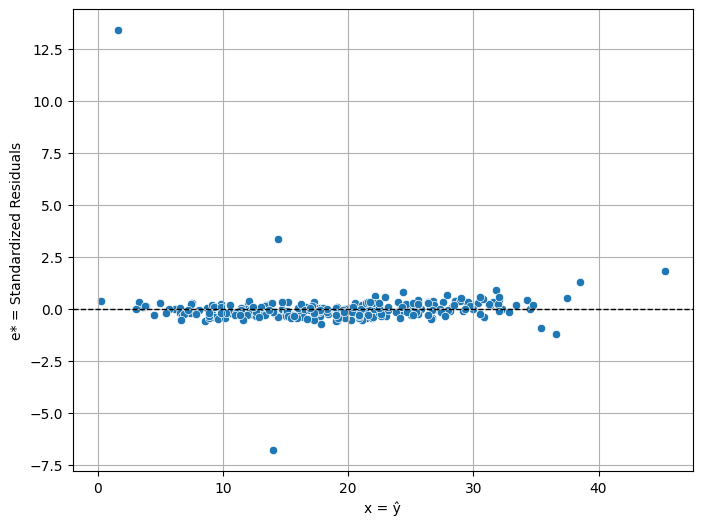

In [92]:
# Variance of standardized errors (should be between -2 and 2)
residue = model.resid

# Create influence instance
influence = model.get_influence()

# Get standardized residuals
stdresid = list(influence.resid_studentized_internal)

# e/e* to check the proportionality between the error and the standardized error
prop = np.divide(residue, stdresid)

# Create a DataFrame to store error-related information
df_errors = pd.DataFrame({'y': df['bodyfat'], 
                           'ŷ': df['ŷ'], 
                           'e': residue,
                           'e*': stdresid,
                           'e/e*': prop})

# Mean of the errors should be close to 0
mean_errors = df_errors['e'].mean()
print(f'Mean of errors: {mean_errors}\n')

# Observe the variance of errors
sns.scatterplot(x='ŷ', y='e*', data=df_errors)
plt.xlabel('x = ŷ')
plt.ylabel('e* = Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show();

/home/ninek/anaconda3/envs/env_py_tools/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Standardized Residuals')

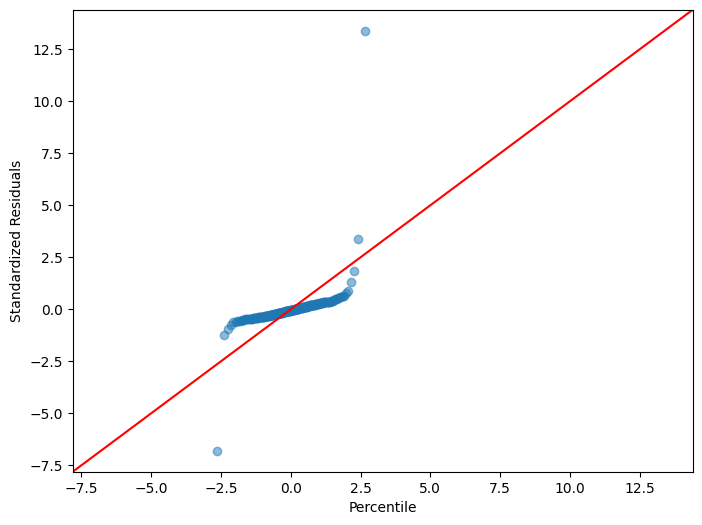

In [93]:
# QQ plot to visualize error variance
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentile')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

In [94]:
# Normality test
# H0: The data is normal (p-value > 0.5)
# H1: The data is not normal (p-value < 0.5)
res = stats.shapiro(df_errors['e'])
res

ShapiroResult(statistic=0.33105266094207764, pvalue=3.054636234623066e-29)

In [96]:
# Heteroscedasticity test (Breusch-Pagan test)
# H0: The variances of errors are equal (homoscedasticity)  # Reliable model (statistical durability and consistency) + (constant error)
# H1: The variances of errors are not equal (heteroscedasticity)  # Unreliable model

# Column names
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
 
# Perform the test
test_result = sms.het_breuschpagan(model.resid, model.model.exog)

# Format the obtained data for visualization
lzip(names, test_result)

[('Lagrange multiplier statistic', 20.082876404451167),
 ('p-value', 0.000163159944272344),
 ('f-value', 7.162562924464476),
 ('f p-value', 0.00012492285389816503)]